# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

## Written Answer:
1. `n_estimators` - The number of trees in the forest.
2. `max_depth` - The maximum depth of the trees. If not changed, defined, that tree will grow until all the leaves are pure, which means that there will be no more possible splits to be made.
3. `max_features` - dictates how many features the function should consider when it looks for the best split of the data.
4. `bootstrap` - dictates whether the samples for each tree in the forest is bootstrapped (selecting n rows from the original dataset with replacement). if left false, then the trees are grown based on the entitre sample provided. 

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

## Written Answer:
I should set `max_features = none` and `bootstrap = False`. That way, the sample of each tree would be identical (it would be the entire dataset), and the trees would grow until no more split can be made. This will result in identical trees.

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

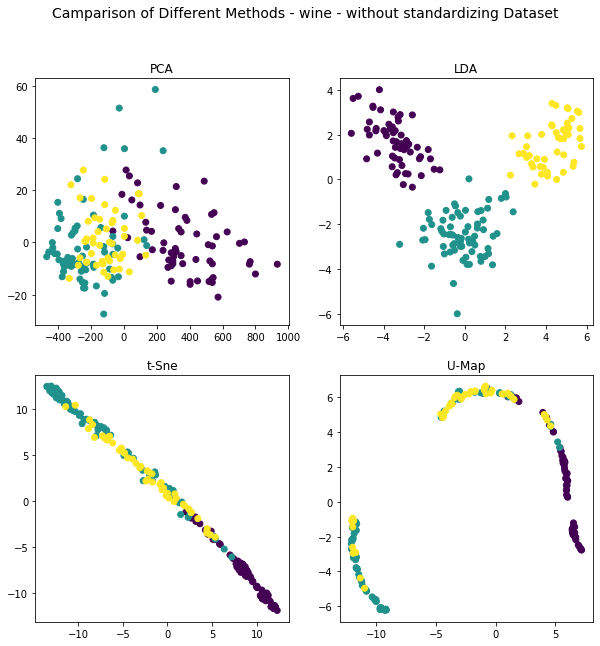

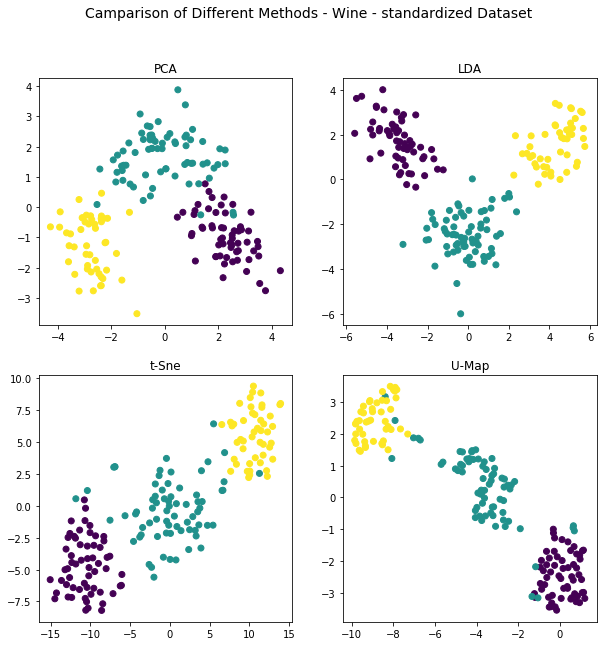

/Users/inbarshamir/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


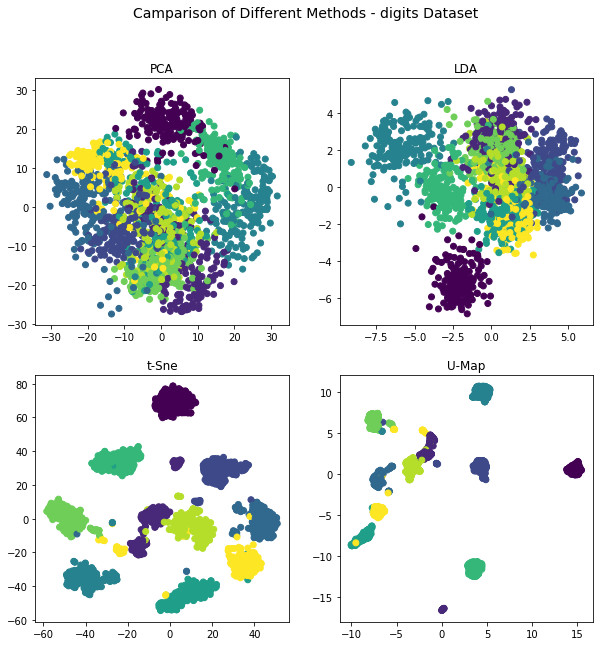

In [27]:
# Solution
# setup: import packages, get data etc.

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
import umap
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']
X_wine_std = StandardScaler().fit_transform(X_wine)

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

#define a function to run models and display outcome
def model_fit(data, target, dataset):
    
    pca = PCA()
    X_pca = pca.fit_transform(data)
    
    lda = LinearDiscriminantAnalysis()
    X_lda = lda.fit_transform(data, target)
    
    tsne = TSNE()
    X_tsne = tsne.fit_transform(data)
    
    X_umap = umap.UMAP().fit_transform(data)

    fig, axes = plt.subplots(nrows= 2, ncols=2, figsize = (10,10))
    fig.suptitle(str("Camparison of Different Methods - " + dataset + ' Dataset'), fontsize=14)

    axes[0][0].scatter(X_pca[:, 0], X_pca[:, 1], c = target)
    axes[0][1].scatter(X_lda[:, 0], X_lda[:, 1], c = target)
    axes[1][0].scatter(X_tsne[:, 0], X_tsne[:, 1], c = target)
    axes[1][1].scatter(X_umap[:, 0], X_umap[:, 1], c = target)
    
    axes[0][0].set_title('PCA')
    axes[0][1].set_title('LDA')
    axes[1][0].set_title('t-Sne')
    axes[1][1].set_title('U-Map')
    
    return  plt.show()

#Run function
model_fit(X_wine, y_wine, 'wine - without standardizing')
model_fit(X_wine_std, y_wine, 'Wine - standardized')
model_fit(X_digits, y_digits, 'digits')

> **Written Answer:**
2. **Question 2:** Unlike the variables in the digits dataset, which are the same size and are the same (as each n,m value represents the ink intensity of digit n in pixel m), the different variables in the wine datasets represent different attributes of that specific kind of wine, can have very different orders of magnitude. Therefore, in order to make them comparable we need to standardize them. 
3. While the the more advancecd classifying algorithms t-Sne and U-map had greater success with the digits dataset, the simpler PCA and LDA algorithm were better at classifying the digits dataset. 

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

## Written Answer:
`honesty` according to Athey and Imbens, honesty is when "one sample is used to construct the partition and
another to estimate treatment effects for each subpopulation". 
The `intuition` for this is, that when we use separataion we essentially increase our cetrainty that our results are valid, because we estimate the treatment effect with a new set of data rather than repeating the same set we used for constructing it.
This is `practically implemented` by separating the trainnig dataset - one part for constructing the tree and another for estimating the treatment effects within the leaves of the tree.